In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#For split the data to train because the number of male and female are not equal.
from sklearn.model_selection import train_test_split

In [3]:
#Read File
df = pd.read_csv("Birthday.csv")
df.head()

,Birthday,Gender
0,19/9/1988,Male
1,10/8/2536,Female
2,7/11/1993,Male
3,14/4/1994,Male
4,19/4/1995,Female


In [4]:
#Prepare for separate birthday into Day, Month, Year.
Birthday_ls = df["Birthday"].tolist()
Day = []
Month = []
Year = []

In [5]:
for i in Birthday_ls:
    Day.append(int(i.split("/")[0]))
    Month.append(int(i.split("/")[1]))
    Year.append(int(i.split("/")[2]))

In [6]:
#Clean for BE to AD.
for i in range(len(Year)):
    if (Year[i] > 2000):
        Year[i] = Year[i]-543

In [7]:
df.drop(["Birthday"], axis=1, inplace=True)

df["Day"] = Day
df["Month"] = Month
df["Year"] = Year

df.head()

,Gender,Day,Month,Year
0,Male,19,9,1988
1,Female,10,8,1993
2,Male,7,11,1993
3,Male,14,4,1994
4,Female,19,4,1995


In [8]:
#All number of data.
num = df["Gender"].count()
num

62

In [9]:
#Separate by male
df_Male = df.loc[df["Gender"]=="Male"]
df_Male.head()

,Gender,Day,Month,Year
0,Male,19,9,1988
2,Male,7,11,1993
3,Male,14,4,1994
5,Male,25,4,1993
7,Male,2,4,1993


In [10]:
#Number of male.
num_Male = df_Male["Gender"].count()
num_Male

34

In [11]:
#Separate by female
df_Female = df.loc[df["Gender"]=="Female"]
df_Female.head()

,Gender,Day,Month,Year
1,Female,10,8,1993
4,Female,19,4,1995
6,Female,17,5,1992
11,Female,9,2,1992
12,Female,24,6,1987


In [12]:
#Number of female.

num_Female = df_Female["Gender"].count()
num_Female

28

In [13]:
#Calculate ratio of each gender. Need 20 sample to test.

print(f"Male = {round(20/num_Male, 3)}")
print(f"Female = {round(20/num_Female, 3)}")

Male = 0.588
Female = 0.714


In [14]:
train_Male, test_Male = train_test_split(df_Male, train_size=0.6)

In [15]:
print(f"Train = {len(train_Male)}")
print(f"Test = {len(test_Male)}")

Train = 20
Test = 14


In [16]:
train_Female, test_Female = train_test_split(df_Female, train_size=0.72)

In [17]:
print(f"Train = {len(train_Female)}")
print(f"Test = {len(test_Female)}")

Train = 20
Test = 8


In [18]:
#Set all labels to columns.

labels = df.columns.tolist()
labels.remove("Gender")
labels

['Day', 'Month', 'Year']

In [19]:
#Find mean score for each gender for analysis.

df_mean_Male = round(train_Male.mean())
df_mean_Female = round(train_Female.mean())

print(f"Male_mean_score = {df_mean_Male.tolist()}")
print(f"Female_mean_score = {df_mean_Female.tolist()}")

Male_mean_score = [19.0, 8.0, 1989.0]
Female_mean_score = [16.0, 7.0, 1990.0]


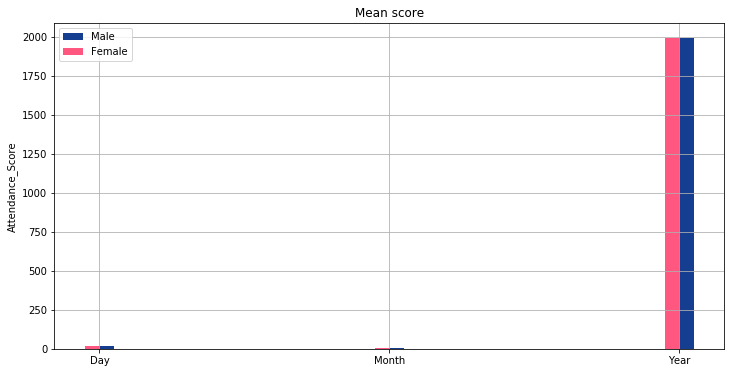

In [20]:
#Data visualization

width = 0.05
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(labels, df_mean_Male, width, label='Male', color="#153e90", align="edge")
ax.bar(labels, df_mean_Female, -width, label='Female', color="#ff577f", align="edge")

ax.set_ylabel("Attendance_Score")
ax.set_title("Mean score")
ax.legend()
ax.grid()

plt.show()

# Desicion Tree

In [21]:
#set 1 == Male
#set 2 == Female

df["Gender"].replace("Male", 1, inplace=True)
df["Gender"].replace("Female", 2, inplace=True)

In [22]:
df.head()

,Gender,Day,Month,Year
0,1,19,9,1988
1,2,10,8,1993
2,1,7,11,1993
3,1,14,4,1994
4,2,19,4,1995


In [23]:
#Set relation
X = df[labels]
Y = df["Gender"]

In [24]:
#Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [25]:
len(X_test)

19

In [26]:
len(Y_test)

19

In [27]:
from sklearn import tree

In [28]:
#Used linearRegreesion Model
model = tree.DecisionTreeClassifier()

In [29]:
#Fit data with model
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
#R squre
model.score(X_test, Y_test)

0.42105263157894735

In [31]:
#Predict value from X_test.
y_hat = model.predict(X_test)
y_hat

array([2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2],
      dtype=int64)

In [32]:
test_model = pd.concat([X_test, Y_test], axis=1)
test_model.head()

,Day,Month,Year,Gender
50,22,5,1985,2
3,14,4,1994,1
27,29,7,1991,2
7,2,4,1993,1
45,20,3,1996,2


In [33]:
#Show result true vs. predict.
data_test = pd.concat([test_model.reset_index(), pd.Series(y_hat, name="Predict")], axis=1)
data_test

,index,Day,Month,Year,Gender,Predict
0,50,22,5,1985,2,2
1,3,14,4,1994,1,2
2,27,29,7,1991,2,1
3,7,2,4,1993,1,2
4,45,20,3,1996,2,1
5,11,9,2,1992,2,2
6,31,8,4,1995,2,1
7,16,16,6,1990,2,2
8,17,4,12,1985,1,2
9,28,1,3,1996,1,1
